######  <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#c3b235">COVID text classification


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
nltk.download('stopwords')
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/preethamvignesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Load COVID tweets dataset


In [2]:
train = pd.read_csv('/Users/preethamvignesh/Desktop/Work/ML_EIT/Data/corona_nlpdata/Corona_NLP_train.csv',encoding='latin')
test = pd.read_csv('/Users/preethamvignesh/Desktop/Work/ML_EIT/Data/corona_nlpdata/Corona_NLP_test.csv', encoding ='latin')

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Data exploration

In [3]:
display(train.head(), test.head())

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [4]:
display(train.shape, test.shape)

(41157, 6)

(3798, 6)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Count the data types

In [5]:
display(train.dtypes.value_counts(), test.dtypes.value_counts())

object    4
int64     2
dtype: int64

object    4
int64     2
dtype: int64

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Train data information

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Checking Duplicates

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Location Missing

In [7]:
pd.DataFrame({'value' : train['Location'], 'Missing?' : train['Location'].isnull()})

,value,Missing?
0,London,False
1,UK,False
2,Vagabonds,False
3,NaN,True
4,NaN,True
...,...,...
41152,"Wellington City, New Zealand",False
41153,NaN,True
41154,NaN,True
41155,NaN,True


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Missing vlaues count

In [8]:
pd.DataFrame( train.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
UserName,0
ScreenName,0
Location,8590
TweetAt,0
OriginalTweet,0
Sentiment,0


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Missing vlaues count and percentage

In [9]:
%run -i 'display_side_by_side.py'
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe

display_side_by_side(missing_percentage(train), missing_percentage(test), titles=['Train','Test'])

,Total,Percent
Location,8590,0.208713
Sentiment,0,0.000000
OriginalTweet,0,0.000000
TweetAt,0,0.000000
ScreenName,0,0.000000
UserName,0,0.000000
,Total,Percent
Location,834,0.219589
Sentiment,0,0.000000
OriginalTweet,0,0.000000


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Total number missing in train and test datasets

In [10]:
trnnull = train.isnull().sum().sum()  # Total number of recognised missing values in the entire dataframe
tstnull = test.isnull().sum().sum()
print("Train missing: " ,trnnull, "\n", "Test missing: ",tstnull)

Train missing:  8590 
 Test missing:  834


In [11]:
labels = train['Sentiment'].unique()
labels

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

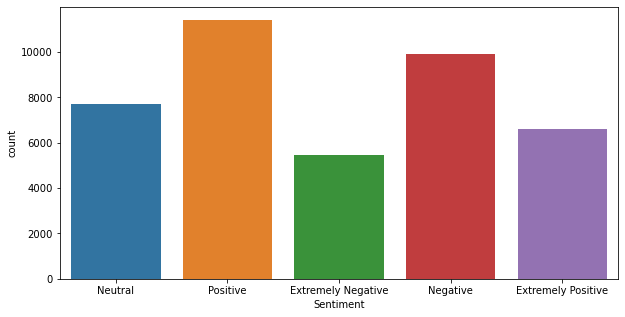

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment', data=train, order=labels, )

Text(0.5, 1.0, 'Test dataset')

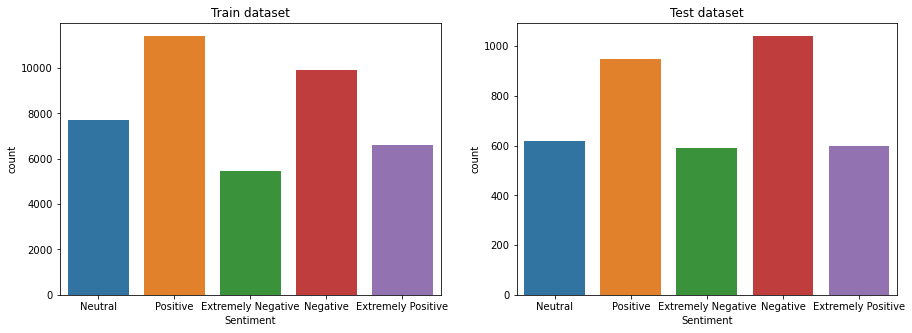

In [13]:
f, axes = plt.subplots(ncols=2, figsize=(15, 5))

sns.countplot(x='Sentiment', data=train, order=labels,ax=axes[0])
axes[0].set_title('Train dataset')

sns.countplot(x='Sentiment', data=test, order=labels,ax=axes[1])
axes[1].set_title('Test dataset')


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Which location is more tweets

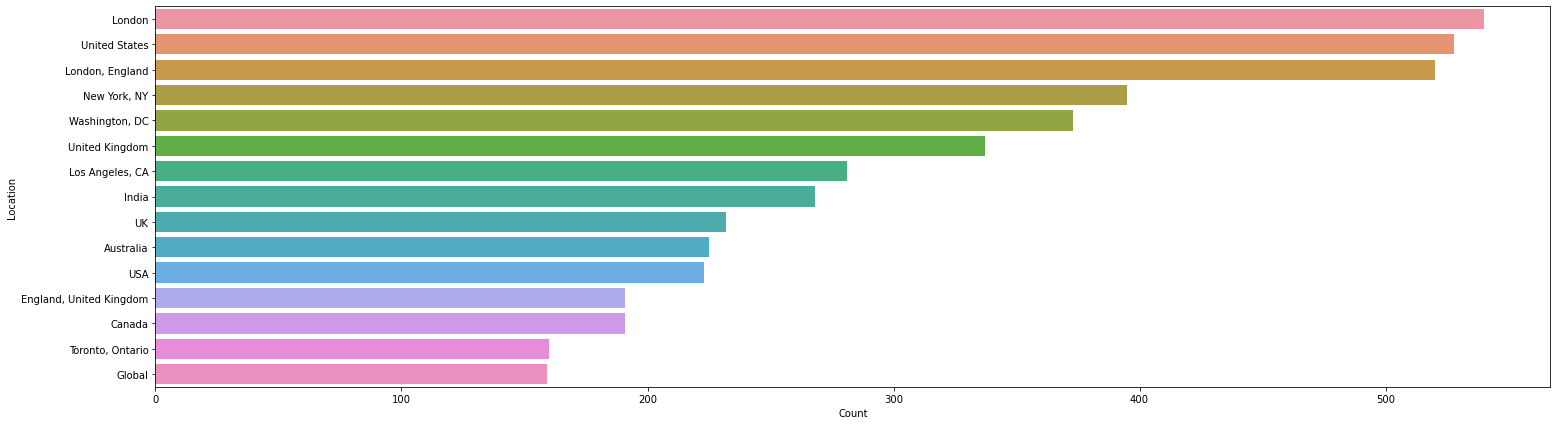

In [14]:
location = train.Location
location = pd.DataFrame(location)
location['Count'] = 1
location = location.groupby('Location').sum().sort_values(by = 'Count', ascending = False).nlargest(15,['Count'])
location = location.reset_index()
plt.figure(figsize=(25,7))
sns.barplot(x = 'Count', y = 'Location', data = location)
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Let's look at the distribution of tweets over time:

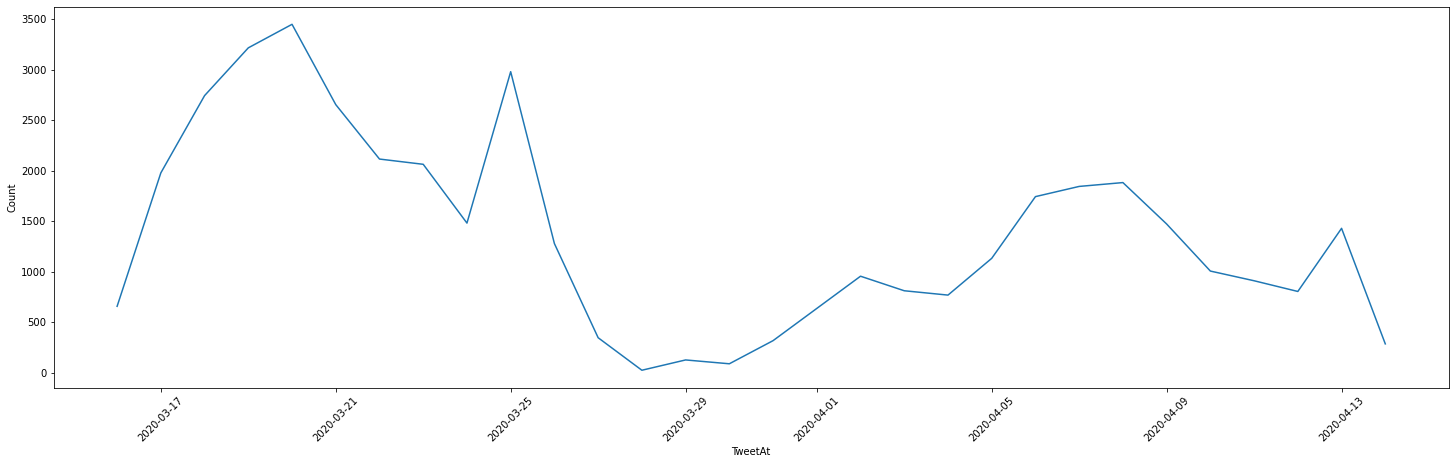

In [15]:
time = train.TweetAt
time = pd.DataFrame(time)
time['Count'] = 1
time = time.groupby('TweetAt').sum()
time = time.reset_index()
time = time.iloc[1:,:]
time['TweetAt'] = pd.to_datetime(time['TweetAt'], format = '%d-%m-%Y')
plt.figure(figsize=(25,7))
sns.lineplot(x = 'TweetAt', y = 'Count', data = time)
plt.xticks(rotation=45)
plt.show()

In [16]:
Min = time.TweetAt.min()
Max = time.TweetAt.max()
print(f'The date range of the data is between {Min} and {Max}')

The date range of the data is between 2020-03-16 00:00:00 and 2020-04-14 00:00:00


######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#35c33a">Data cleaning

In [17]:
# Drop variables Let's first drop UserName and 
# ScreenName as they are only id variables so we won't use them:
train = train.drop(['UserName','ScreenName'], axis = 1)
test = test.drop(['UserName','ScreenName'], axis = 1)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Tweets variable

In [18]:
#Transform it into a datetime column
train['TweetAt'] = pd.to_datetime(train['TweetAt'], format = '%d-%m-%Y')
test['TweetAt'] = pd.to_datetime(test['TweetAt'], format = '%d-%m-%Y')

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Original tweet cleaning
    
- Now we will start fixing the tweets, we need to remove the punctuation and specific characters etc..

In [19]:
train.OriginalTweet.head(10)

0    @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1    advice Talk to your neighbours family to excha...
2    Coronavirus Australia: Woolworths to give elde...
3    My food stock is not the only one which is emp...
4    Me, ready to go at supermarket during the #COV...
5    As news of the regionÂs first confirmed COVID...
6    Cashier at grocery store was sharing his insig...
7    Was at the supermarket today. Didn't buy toile...
8    Due to COVID-19 our retail store and classroom...
9    For corona prevention,we should stop to buy th...
Name: OriginalTweet, dtype: object

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Transform to lower:

In [20]:
# Transform to lower:
train.OriginalTweet = train.OriginalTweet.str.lower()
test.OriginalTweet = test.OriginalTweet.str.lower()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Remove urls:

In [21]:
#Remove urls:
train.OriginalTweet = train.OriginalTweet.str.replace('http\S+|www.\S+', '', case=False)
test.OriginalTweet = test.OriginalTweet.str.replace('http\S+|www.\S+', '', case=False)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Remove hashtag character:

In [22]:
#Remove hashtag character
train.OriginalTweet = train.OriginalTweet.str.replace('#', '', case=False)
test.OriginalTweet = test.OriginalTweet.str.replace('#', '', case=False)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Remove punctuation, special characters & mentions:

In [23]:
# Remove punctuation, special characters & mentions:
train.OriginalTweet = train.OriginalTweet.str.replace(r'[^\w\s]', '', case=False)
test.OriginalTweet = test.OriginalTweet.str.replace(r'[^\w\s]', '', case=False)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Remove stopwords:

In [24]:
# #Remove stopwords:
stop_words = set(stopwords.words('english'))
train.OriginalTweet = train.OriginalTweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
test.OriginalTweet = test.OriginalTweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Remove non alphabetic words:

In [25]:
#Remove non alphabetic words:
train.OriginalTweet = train.OriginalTweet.apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))
test.OriginalTweet = test.OriginalTweet.apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Remove emptys rows:

In [26]:
#Remove emptys rows:
train = train[train.OriginalTweet != '']
test = test[test.OriginalTweet != '']

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Initiate a lemmatizer and lemmatize each word in the data

In [27]:
#Initiate a lemmatizer and lemmatize each word in the data
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
train.OriginalTweet = train.OriginalTweet.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
test.OriginalTweet = test.OriginalTweet.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Let's check if the cleaning seems okay:

In [28]:
for i in range(0,5):
    print(i,':',train.OriginalTweet[i])
    print(i,':',test.OriginalTweet[i])

0 : menyrbie chrisitv
0 : trending new yorkers encounter empty supermarket shelf pictured wegmans brooklyn soldout online grocer foodkick maxdelivery coronavirusfearing shopper stock
1 : advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order
1 : couldnt find hand sanitizer fred meyer turned amazon pack purellcheck coronavirus concern driving price
2 : coronavirus australia woolworth give elderly disabled dedicated shopping hour amid outbreak
2 : find protect loved one coronavirus
3 : food stock one empty please dont panic enough food everyone take need stay calm stay safe coronavirus confinement confinementotal confinementgeneral
3 : panic buying hit newyork city anxious shopper stock foodampmedical supply healthcare worker becomes bigapple confirmed coronavirus patient bloomberg staged event qanon cdc
4 : ready go supermarket outbreak im paranoid food stoc

In [29]:
display(train.head(), test.head())

,Location,TweetAt,OriginalTweet,Sentiment
0,London,2020-03-16,menyrbie chrisitv,Neutral
1,UK,2020-03-16,advice talk neighbour family exchange phone nu...,Positive
2,Vagabonds,2020-03-16,coronavirus australia woolworth give elderly d...,Positive
3,NaN,2020-03-16,food stock one empty please dont panic enough ...,Positive
4,NaN,2020-03-16,ready go supermarket outbreak im paranoid food...,Extremely Negative


,Location,TweetAt,OriginalTweet,Sentiment
0,NYC,2020-03-02,trending new yorkers encounter empty supermark...,Extremely Negative
1,"Seattle, WA",2020-03-02,couldnt find hand sanitizer fred meyer turned ...,Positive
2,NaN,2020-03-02,find protect loved one coronavirus,Extremely Positive
3,Chicagoland,2020-03-02,panic buying hit newyork city anxious shopper ...,Negative
4,"Melbourne, Victoria",2020-03-03,toiletpaper dunnypaper coronavirus coronavirus...,Neutral


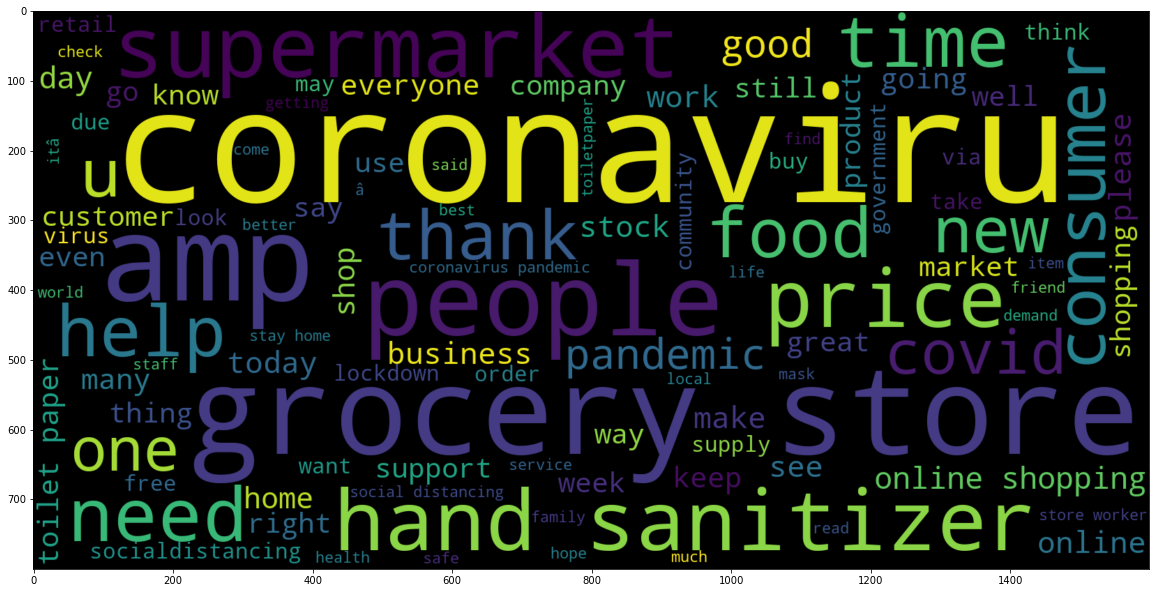

In [30]:
# Top 100 words for positive tweets:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(train[(train.Sentiment == 'Positive') | (train.Sentiment == 'Extremely Positive')].OriginalTweet))
plt.imshow(wc , interpolation = 'bilinear')

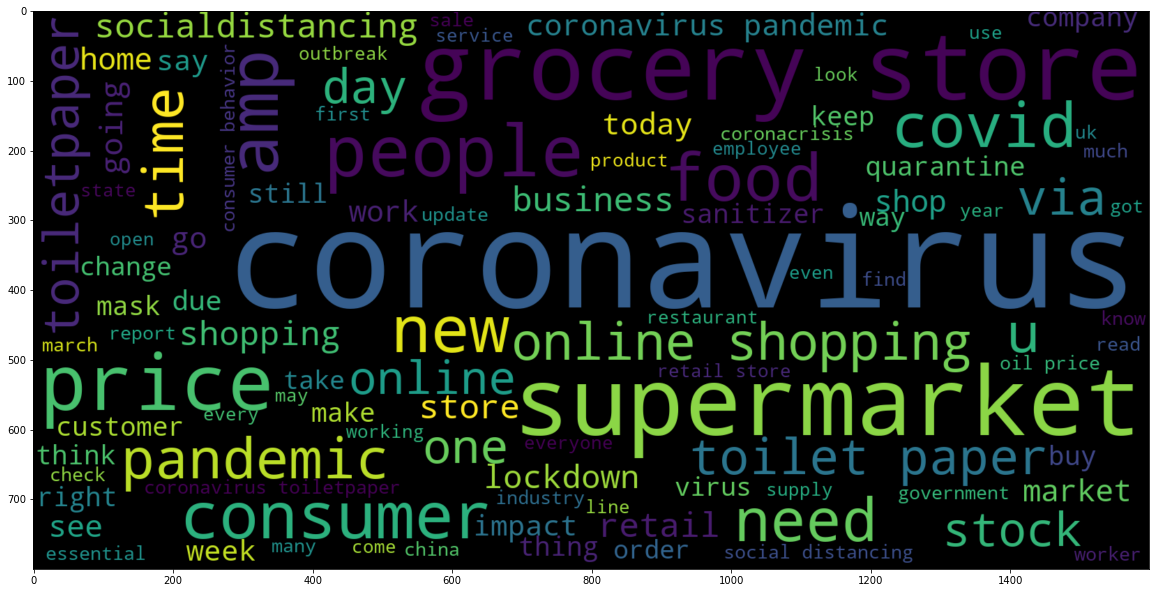

In [31]:
#Top 100 words for neutral tweets:
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(train[train.Sentiment == 'Neutral'].OriginalTweet))
plt.imshow(wc , interpolation = 'bilinear')

It seems 👌, now let's go into the data preparation for our model:

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c33a">Save the data cleaned to be an input for our models

In [32]:
#Save the data cleaned to be an input for our models
train.to_csv('/Users/preethamvignesh/Desktop/Work/ML_EIT/Data/corona_nlpdata/covidtweets_train_cleaned.csv', index=False)
test.to_csv('/Users/preethamvignesh/Desktop/Work/ML_EIT/Data/corona_nlpdata/covidtweets_test_cleaned.csv', index=False)